In [ ]:
import matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from dtreeviz.trees import dtreeviz
#!pip install pandas
#!pip install --upgrade xlrd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
master_df = pd.DataFrame()
fnames = ['NBA Stats 202122 All Player Statistics in one Page.xlsx', '2020-2021 NBA Stats  Player Box Score  Advanced Metrics.xlsx', '2019-2020 NBA Player Stats.xlsx', '2018-2019 NBA Player Stats.xlsx']
seasons = ['2021-2022', '2020-2021', '2019-2020', '2018-2019']
final_teams = [['Mia', 'Bos', 'Dal', 'Gol'], ['Lac', 'Pho', 'Atl', 'Mil'], ['Lal', 'Den', 'Mia', 'Bos'], ['Gol', 'Por', 'Tor', 'Mil']]
i=0
for fname in fnames:
  data=pd.read_excel('drive/My Drive/fp_521_test/'+fname, index_col=0, skiprows=1)
  data.columns = ['Player_name', 'team', 'pos', 'age', 'gp', 'mpg', 'min%', 'usg%', 'tor%', 'fta', 'ft%', '2pa', '2p%', '3pa', '3p%', 'efg%', 'ts%', 'ppg', 'rpg', 'trb%', 'apg', 'ast%', 'spg', 'bpg', 'topg', 'vi', 'ortg', 'drtg']
  data['year'] = seasons[i]
  data['Final_four'] = data['team'].isin(final_teams[i]).astype(int)
  data = data.reset_index(drop=True)
  master_df = master_df.append(data)
  i+=1
print(master_df.shape)
master_df.head()

(2555, 30)


,Player_name,team,pos,age,gp,mpg,min%,usg%,tor%,fta,...,apg,ast%,spg,bpg,topg,vi,ortg,drtg,year,Final_four
0,Precious Achiuwa,Tor,F,22.56,73,23.6,49.2,18.5,11.3,131,...,1.1,6.9,0.51,0.56,1.15,6.8,105.4,104.0,2021-2022,0
1,Steven Adams,Mem,C,28.73,76,26.3,54.8,12.0,19.6,199,...,3.4,16.1,0.87,0.79,1.51,9.4,124.7,103.9,2021-2022,0
2,Bam Adebayo,Mia,C-F,24.73,56,32.6,67.9,25.0,14.4,340,...,3.4,17.5,1.43,0.79,2.64,10.7,117.2,98.2,2021-2022,1
3,Santi Aldama,Mem,F-C,21.25,32,11.2,23.4,18.5,9.9,32,...,0.7,7.7,0.19,0.31,0.50,7.1,101.1,103.9,2021-2022,0
4,LaMarcus Aldridge,Bro,C-F,36.73,47,22.3,46.5,22.4,8.0,102,...,0.9,6.3,0.30,1.00,0.94,7.2,119.6,108.8,2021-2022,0


In [ ]:
master_df['Final_four'].value_counts()

0    2224
1     331
Name: Final_four, dtype: int64

In [ ]:
master_df['Final_four'].isna().sum()

0

Distribution of minutes played appears to be relatively normally distributed.

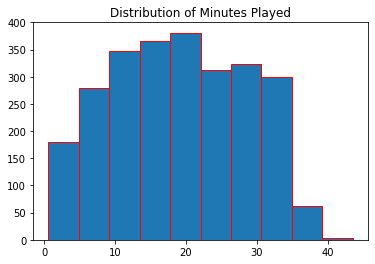

In [ ]:
plt.hist(master_df['mpg'], bins=10, edgecolor='red')
plt.title("Distribution of Minutes Played")
plt.show()

Most of our players are between 20 and 30 years old.

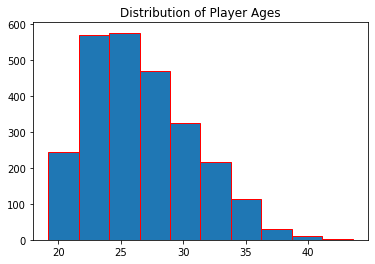

In [ ]:
plt.hist(master_df['age'], edgecolor='red')
plt.title("Distribution of Player Ages")
plt.show() 

In [ ]:
master_df.isna().sum()

Player_name      0
team             0
pos              0
age              0
gp               0
mpg              0
min%             0
usg%             0
tor%            22
fta              0
ft%              0
2pa              0
2p%              0
3pa              0
3p%              0
efg%            25
ts%             23
ppg              0
rpg              0
trb%             0
apg              0
ast%             0
spg              0
bpg              0
topg             0
vi               0
ortg           132
drtg           129
year             0
Final_four       0
dtype: int64

In [ ]:
master_df=master_df.fillna(0)

In [ ]:
master_df.isna().sum()

Player_name    0
team           0
pos            0
age            0
gp             0
mpg            0
min%           0
usg%           0
tor%           0
fta            0
ft%            0
2pa            0
2p%            0
3pa            0
3p%            0
efg%           0
ts%            0
ppg            0
rpg            0
trb%           0
apg            0
ast%           0
spg            0
bpg            0
topg           0
vi             0
ortg           0
drtg           0
year           0
Final_four     0
dtype: int64

Most features are relatively uncorrelated. However, we have a few that are, such as mpg and fta, which makes sense because the more time a player is on the court, the more free throw attempts they are going to have. Minutes per game seems to be correlated with a few of these features, but nothing to be concerned about. If we find that these features do become problematic, we can decide to normalize them.

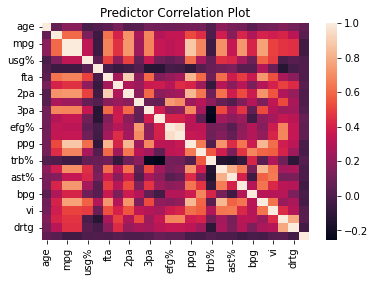

In [ ]:
correlation_features = master_df.drop(['Player_name', 'team'], axis=1)
corr = correlation_features.corr()
heatmap = sns.heatmap(corr)
plt.title("Predictor Correlation Plot")
plt.show()

In [ ]:
all_players = master_df
best_players = all_players[all_players['min%']>10]
print(all_players.shape, best_players.shape)

(2555, 30) (2376, 30)


In [ ]:
best_players.isna().sum()

Player_name    0
team           0
pos            0
age            0
gp             0
mpg            0
min%           0
usg%           0
tor%           0
fta            0
ft%            0
2pa            0
2p%            0
3pa            0
3p%            0
efg%           0
ts%            0
ppg            0
rpg            0
trb%           0
apg            0
ast%           0
spg            0
bpg            0
topg           0
vi             0
ortg           0
drtg           0
year           0
Final_four     0
dtype: int64

In [ ]:
#all_players_df = all_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), max_ft_perc=('ft%', 'max'), min_ft_perc=('ft%', 'min'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), max_2p_perc=('2p%', 'max'), min_2p_perc=('2p%', 'min'), avg_2p_perc=('3p%', 'mean'), avg_3pa=('3pa', 'mean'), max_3p_perc=('3p%', 'max'), min_3p_perc=('3p%', 'min'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), avg_ts_perc=('ts%', 'mean'), avg_ppg=('ppg', 'mean'), max_ppg=('ppg', 'max'), min_ppg=('ppg', 'min'), avg_rpg=('rpg','mean'), avg_trb_perc=('trb%', 'mean'), max_trb_perc=('trb%', 'max'), avg_apg=('apg', 'mean'), max_apg=('apg', 'max'), avg_spg=('spg', 'mean'), avg_bpg=('bpg', 'mean'), avg_tpg=('topg', 'mean'), max_tpg=('topg', 'max'), max_ortg=('ortg', 'max'), max_drtg=('drtg', 'max'), final_four=('Final_four', 'max'))
#best_players_df = best_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), max_ft_perc=('ft%', 'max'), min_ft_perc=('ft%', 'min'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), max_2p_perc=('2p%', 'max'), min_2p_perc=('2p%', 'min'), avg_2p_perc=('3p%', 'mean'), avg_3pa=('3pa', 'mean'), max_3p_perc=('3p%', 'max'), min_3p_perc=('3p%', 'min'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), avg_ts_perc=('ts%', 'mean'), avg_ppg=('ppg', 'mean'), max_ppg=('ppg', 'max'), min_ppg=('ppg', 'min'), avg_rpg=('rpg','mean'), avg_trb_perc=('trb%', 'mean'), max_trb_perc=('trb%', 'max'), avg_apg=('apg', 'mean'), max_apg=('apg', 'max'), avg_spg=('spg', 'mean'), avg_bpg=('bpg', 'mean'), avg_tpg=('topg', 'mean'), max_tpg=('topg', 'max'), max_ortg=('ortg', 'max'), max_drtg=('drtg', 'max'), final_four=('Final_four', 'max'))
#all_players_df = all_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), max_fta=('fta', 'max'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('3p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), avg_ppg=('ppg', 'mean'), final_four=('Final_four', 'max'))
#best_players_df = best_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), max_fta=('fta', 'max'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('3p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), avg_ppg=('ppg', 'mean'), final_four=('Final_four', 'max'))


In [ ]:
#results in 77% accuracy:
all_players_df = all_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('2p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), avg_ppg=('ppg', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), final_four=('Final_four', 'max'))
best_players_df = best_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('2p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'),avg_efg_perc=('efg%', 'mean'), avg_ppg=('ppg', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), final_four=('Final_four', 'max'))

In [ ]:
all_players_df = all_players_df.reset_index()
best_players_df = best_players_df.reset_index()
all_players_df.head()

,team,year,avg_age,avg_turnover_rate,avg_fta,avg_ft_perc,avg_2pa,avg_2p_perc,avg_3pa,avg_3p_perc,avg_efg_perc,avg_ppg,max_rpg,avg_trb_perc,max_apg,max_spg,avg_bpg,min_topg,final_four
0,Atl,2018-2019,25.753182,11.631818,87.181818,0.619455,204.181818,0.456273,137.954545,0.331091,0.542818,7.450000,9.8,10.877273,8.1,1.33,0.341818,0.00,0
1,Atl,2019-2020,26.711429,13.004762,74.571429,0.689762,173.904762,0.461238,115.047619,0.259667,0.460095,8.185714,10.1,9.623810,9.3,1.31,0.440476,0.00,0
2,Atl,2020-2021,26.416111,12.933333,96.944444,0.783833,215.500000,0.472056,133.444444,0.282889,0.496889,9.411111,14.3,9.983333,9.4,1.27,0.388333,0.27,1
3,Atl,2021-2022,26.000417,9.962500,76.208333,0.688375,184.125000,0.484417,117.583333,0.298625,0.501542,7.991667,11.9,9.816667,9.7,1.33,0.290000,0.00,0
4,Bos,2018-2019,26.311765,9.835294,94.000000,0.695588,270.176471,0.547176,166.411765,0.313588,0.546353,9.176471,6.7,11.894118,6.9,1.79,0.415294,0.00,0


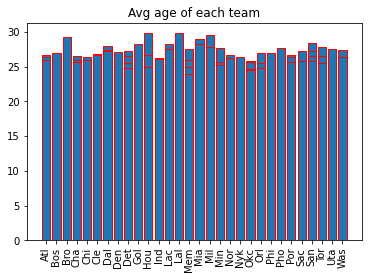

In [ ]:
plt.bar(all_players_df['team'], all_players_df['avg_age'], edgecolor='red')
plt.title("Avg age of each team")
plt.xticks(rotation = 90)
plt.show() 

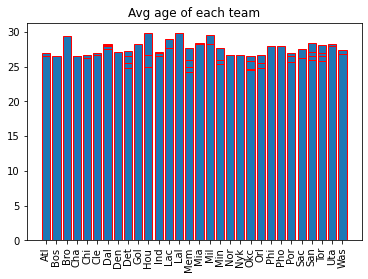

In [ ]:
plt.bar(best_players_df['team'], best_players_df['avg_age'], edgecolor='red')
plt.title("Avg age of each team")
plt.xticks(rotation = 90)
plt.show() 

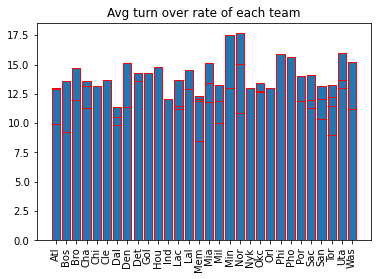

In [ ]:
plt.bar(all_players_df['team'].sort_values(), all_players_df['avg_turnover_rate'], edgecolor='red')
plt.title("Avg turn over rate of each team")
plt.xticks(rotation = 90)
plt.show() 

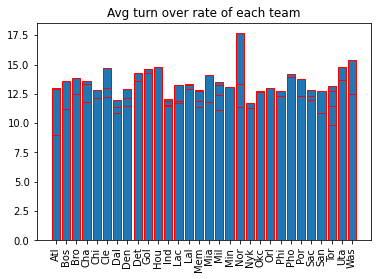

In [ ]:
plt.bar(best_players_df['team'], best_players_df['avg_turnover_rate'], edgecolor='red')
plt.title("Avg turn over rate of each team")
plt.xticks(rotation = 90)
plt.show() 

Splitting our data

In [ ]:
random_seed = 9
target = all_players_df.pop('final_four')
x = all_players_df.drop(['team', 'year'], axis=1)
y = target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=True, random_state = random_seed) 
x_dev, x_test, y_dev, y_test = train_test_split(x_test,y_test, test_size=0.5, shuffle=True, random_state = random_seed) #creating development set

In [ ]:
random_seed = 9
target_best = best_players_df.pop('final_four')
x_best = best_players_df.drop(['team', 'year'], axis=1)
y_best = target_best
x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(x_best,y_best, test_size=0.3, shuffle=True, random_state = random_seed) 
x_dev_best, x_test_best, y_dev_best, y_test_best = train_test_split(x_test_best,y_test_best, test_size=0.5, shuffle=True, random_state = random_seed) #creating development set

Fitting a tree model for all players

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
fitted = clf.fit(x_train, y_train)
print(fitted.score(x_dev, y_dev.astype(int)))

0.7777777777777778


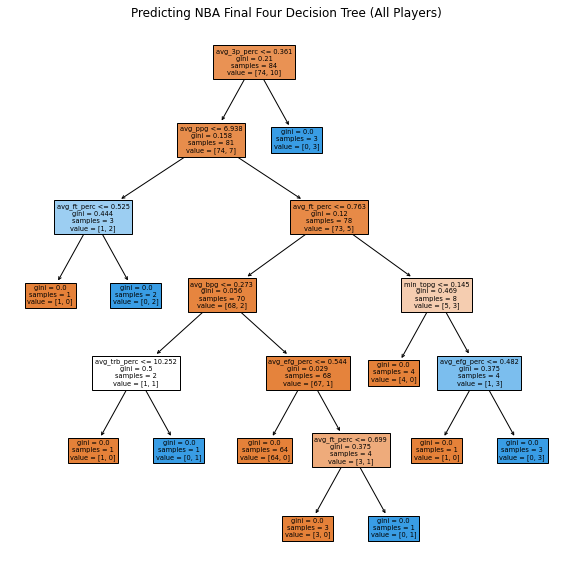

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names = x_train.columns, filled=True)
plt.title("Predicting NBA Final Four Decision Tree (All Players)")
plt.show()

In [ ]:
y.unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


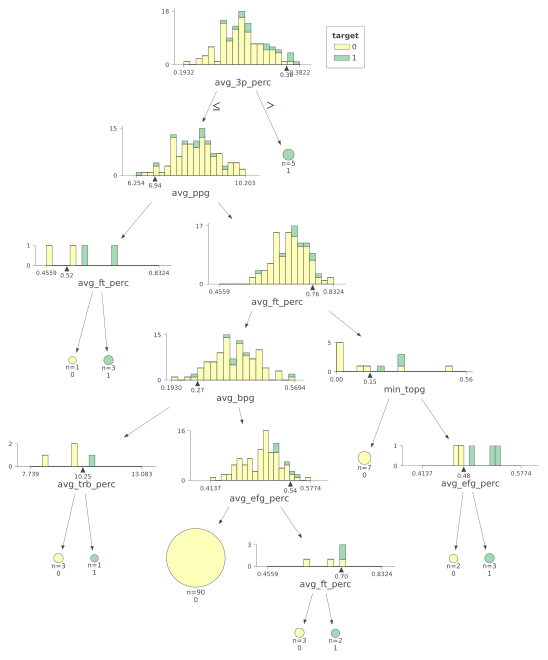

In [ ]:
dtreeviz(clf, x, y, target_name="target",feature_names=x_train.columns, class_names=list(y.unique()))

In [ ]:
clf_best = DecisionTreeClassifier(random_state=1)
fitted_best = clf_best.fit(x_train_best, y_train_best)
print(fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.4444444444444444


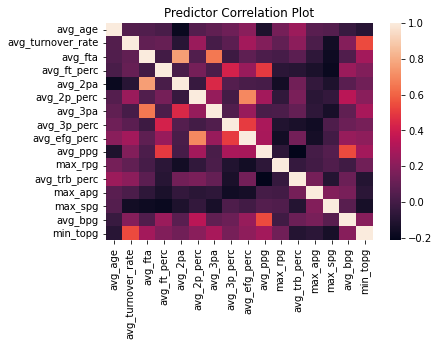

In [ ]:
corr = x_train.corr()
heatmap = sns.heatmap(corr)
plt.title("Predictor Correlation Plot")
plt.show()

In [ ]:
rf_cls = RandomForestClassifier(n_estimators = 15, max_depth = 3, random_state=1)
rf_fitted = rf_cls.fit(x_train, y_train)
print(rf_fitted.score(x_dev, y_dev.astype(int)))

0.7777777777777778


In [ ]:
rf_cls_best = RandomForestClassifier(n_estimators = 15, max_depth = 3, random_state=1)
rf_fitted_best = rf_cls_best.fit(x_train_best, y_train_best)
print(rf_fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.7777777777777778


In [ ]:
chosen_scaler = StandardScaler
logistic_regression = make_pipeline(chosen_scaler(), LogisticRegression(random_state=1, max_iter=1000))
lr_fitted = logistic_regression.fit(x_train, y_train)
print(lr_fitted.score(x_dev, y_dev.astype(int)))

0.5555555555555556


In [ ]:
chosen_scaler = StandardScaler
logistic_regression_best = make_pipeline(chosen_scaler(), LogisticRegression(random_state=1, max_iter=1000))
lr_fitted_best = logistic_regression_best.fit(x_train_best, y_train_best)
print(lr_fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.6111111111111112


In [ ]:
importances = rf_cls.feature_importances_
len(importances)

16

In [ ]:
sum(importances)

1.0

In [ ]:
colors=["#f54281", "#fce1f6", "#f5bfd0", "#fc79a3", "#d943b6", "#d943b6", "#f29495", "#e0afe0", "#f5e9ed","#572346", "#dfb0f5", "#f48cff", "#ba144c", "#fa5089", "#ff8c9d", "#f50555"]
len(colors)

16

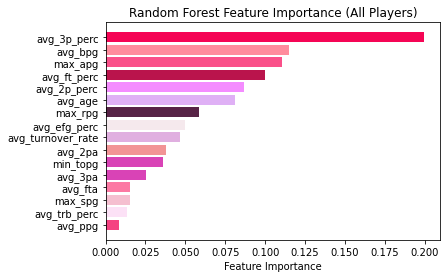

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices], color=colors)
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(x_train.columns)[indices])
plt.title("Random Forest Feature Importance (All Players)")
plt.xlabel("Feature Importance")
plt.show()